# <font color = lightcoral> Extending Agents 3 with Timeseries Data
>    
##### <font color = red> Testing High Precision Model --> 20240712_Transformers_Non_Overlapping_run_143_of_180.pt

**20240715_flask_app_model_change_v1.00.py**

> From transformer models
>

# <font color = red> Template Creation

## <font color = grey> Admin

In [1]:
import pandas as pd
import os
import gzip
import time
import warnings
import os
import shutil
from datetime import datetime
import time
# Set display option to show the full length of the column
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

# Determine the base directory based on the effective user ID
if os.geteuid() == 0:  # root user
    base_dir = '/root'
else:
    base_dir = '/home/sagemaker-user'

# Set the environment variable
os.environ['BASE_DIR'] = base_dir

# Verify the base directory
print(f"Base directory set to: {base_dir}")

import warnings
warnings.simplefilter("ignore")


Base directory set to: /home/sagemaker-user


---

# <font color = lightsteelblue> 5 Key Files

In [ ]:
# import pandas as pd
# import numpy as np
# import time

# data_dir = '/home/ubuntu/efs-w210-capstone-ebs/00.GabbleGrid/02.Local_Data_Files'

# # ################################## Part 1: Parsed Raw File ###################################

# # print("\n" + "*"*100)
# # print("********************** Part 1: Parsed Raw File ******************************************")
# # print("*"*100 + "\n")

# # parsed_file =  f"{data_dir}/01.BGL.log_structured.csv"
# # parsed_file_df = pd.read_csv(parsed_file)
# # display(parsed_file_df.head())
# # print("Shape of Parsed Raw File:", parsed_file_df.shape)

# ######################### Part 2: Encoded File with Feature for Model Training ######################

# print("\n" + "*"*100)
# print("********************** Part 2: Input Data with Features ******************************************")
# print("*"*100 + "\n")

# encoded_feature_input_file = f"{data_dir}/03.20240715_143154_orig_input_w_seq_info_FINAL.parquet"
# encoded_feature_input_file_df = pd.read_parquet(encoded_feature_input_file)
# display(encoded_feature_input_file_df.iloc[:, :25].head())
# print("Shape of Encoded File with Features:", encoded_feature_input_file_df.shape)

# ######################### Part 3: Orig Parquet File with 20 Event Columns (Most and Least used) Only for Mapping ######################

# print("\n" + "*"*100)
# print("********************** Part 3:  Orig Parquet File with 20 Event Columns (Most and Least used) Only for Mapping ******************************************")
# print("*"*100 + "\n")

# import pandas as pd

# # data_dir = '/home/ubuntu/efs-w210-capstone-ebs/00.GabbleGrid/02.Local_Data_Files'
# # Load the latest file
# latest_file = f"{data_dir}/03B.20240716_072206_orig_parquet_mapper_agents.parquet"
# latest_df = pd.read_parquet(latest_file)

# # Display the head of the final dataframe
# display(latest_df.head())
# display(latest_df.tail())

# print("Shape of File:", latest_df.shape)

# # ######################### Part 4: Encoded File where Train_Test = Test HEAD ###############################

# # print("\n" + "*"*100)
# # print("********************** Part 4: Test Set - HEAD *******************************")
# # print("*"*100 + "\n")

# # encoded_feature_input_test_df = encoded_feature_input_file_df[encoded_feature_input_file_df['Train_Test'] == 'Test']
# # display(encoded_feature_input_test_df.iloc[:, :25].head(10))
# # print("Shape of Encoded File where Train_Test = Test:", encoded_feature_input_test_df.shape)


# # ######################### Part 5: Encoded File where Train_Test = Test MIDDLE ###############################

# # # Part 4: Encoded File where Train_Test = Test (Records 100-200)
# # print("\n" + "*"*100)
# # print("********************** Part 5: Test Set - Records 100-200 *******************************")
# # print("*"*100 + "\n")


# # encoded_feature_input_test_df = encoded_feature_input_file_df[encoded_feature_input_file_df['Train_Test'] == 'Test']
# # display(encoded_feature_input_test_df.iloc[100:110, :25])
# # print("Shape of Encoded File where Train_Test = Test:", encoded_feature_input_test_df.shape)

# # ######################### Part 6: Encoded File where Train_Test = Test TAIL ###############################

# # print("\n" + "*"*100)
# # print("********************** Part 6: Test Set - TAIL *******************************")
# # print("*"*100 + "\n")

# # encoded_feature_input_test_df = encoded_feature_input_file_df[encoded_feature_input_file_df['Train_Test'] == 'Test']
# # display(encoded_feature_input_test_df.iloc[:, :25].tail(10))
# # print("Shape of Encoded File where Train_Test = Test:", encoded_feature_input_test_df.shape)


# # ######################### Part 7: Event_ID to Template Mapping #######################################

# # print("\n" + "*"*100)
# # print("********************** Part 7: Event_ID to Template Mapping ******************************************")
# # print("*"*100 + "\n")

# # eventid_template_file = f"{data_dir}/04.20240711_Template_to_EventID_Mapping_v1.00.csv"
# # eventid_template_df = pd.read_csv(eventid_template_file)
# # display(eventid_template_df.head())
# # print("Shape of Event_ID to Template Mapping:", eventid_template_df.shape)

# # ######################### Part 8: Event_ID to Encoding Mapping #######################################

# # print("\n" + "*"*100)
# # print("********************** Part 8: Event_ID to Encoding Mapping ******************************************")
# # print("*"*100 + "\n")

# # eventid_encoding_file = f"{data_dir}/05.20240711_EventID_to_EncodedInteger_Mapping_v1.00.csv"
# # eventid_encoding_df = pd.read_csv(eventid_encoding_file)
# # display(eventid_encoding_df.head())
# # print("Shape of Event_ID to Encoding Mapping:", eventid_encoding_df.shape)

# ######################### Part 9: Event_ID to Template Mapping #######################################

# print("\n" + "*"*100)
# print("********************** Part 9: Event_ID to Template Mapping ******************************************")
# print("*"*100 + "\n")

# eventid_encoding_file = f"{data_dir}/08.20240716031626_event_ID_int_template_mapping.csv"
# eventid_encoding_df = pd.read_csv(eventid_encoding_file)
# display(eventid_encoding_df.head())
# print("Shape of Event_ID to Encoding Mapping:", eventid_encoding_df.shape)

# # ######################### Part 10: First Two Records from X_test and y_test #######################

# # print("\n" + "*"*100)
# # print("********************** Part 10: First Two Records from X_test and y_test *****************************")
# # print("*"*100 + "\n")

# # file_prefix = "06.20240714_062624_non_overlap_full_test"  # Replace with your actual file prefix

# # # Load the test data
# # X_test = np.load(f"{data_dir}/{file_prefix}_X_test.npy")
# # y_test = np.load(f"{data_dir}/{file_prefix}_y_test.npy")

# # # Convert the first two records to DataFrames for better display
# # X_test_first_two = pd.DataFrame(X_test[:2].reshape(-1, X_test.shape[2]))
# # y_test_first_two = pd.DataFrame(y_test[:2], columns=['Actual'])

# # # Display the first two records
# # print("First two records from X_test:")
# # display(X_test_first_two)

# # print("\nFirst two records from y_test:")
# # display(y_test_first_two)

___
# <font color = red> Agent 3 Inference: TERTIARY --> DONE
## Map EventID integers to Template Text and add 2 new columns for tacking

### <font color = grey> This agent will then work with Agents 1 & 2 as needed

### <font color = blue>CURRENT

In [ ]:
# import requests
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
# from datetime import datetime
# import re
# import torch

# # Parameters
# data_dir = '/home/ubuntu/efs-w210-capstone-ebs/00.GabbleGrid/02.Local_Data_Files'
# save_dir = '/home/ubuntu/efs-w210-capstone-ebs/00.GabbleGrid/03.Local_Inference_Eval_Files'
# file_prefix = "06.20240714_062624_non_overlap_full_test"  # Replace with your actual file prefix

# # Model parameters
# max_events = 5  # Set your actual max_events
# input_length = 30  # Set your actual input_length
# gap = 2  # Set your actual gap
# prediction_period = 1  # Set your actual prediction_period

# # Other parameters
# start_time = '2005-11-08 18:50:00'  # seq 11624
# num_tests = 130

# # Define the number of records for each test run (input_length + gap + prediction_period)
# num_records_per_test = input_length + gap + prediction_period

# # Load the test data
# X_test = np.load(f"{data_dir}/{file_prefix}_X_test.npy")
# y_test = np.load(f"{data_dir}/{file_prefix}_y_test.npy")

# print(f"X_test shape: {X_test.shape}")
# print(f"y_test shape: {y_test.shape}")

# # Load the original parquet file with sequence mapping
# input_file = f"{data_dir}/03.20240715_143154_orig_input_w_seq_info_FINAL.parquet"
# original_df = pd.read_parquet(input_file)

# # Ensure Seq_Num is integer for proper merging
# original_df['Seq_Num'] = original_df['Seq_Num'].astype(int)

# # Filter the test dataset based on the specified start time
# filtered_df = original_df[(original_df['Train_Test'] == 'Test') & (original_df['time_start'] == start_time)]
# if filtered_df.empty:
#     start_date = pd.to_datetime(start_time).date()
#     same_date_df = original_df[(original_df['Train_Test'] == 'Test') & (pd.to_datetime(original_df['time_start']).dt.date == start_date)]
#     if not same_date_df.empty:
#         available_times = same_date_df['time_start'].unique().tolist()
#         print(f"Error: start_time {start_time} not found in the dataset. Available times on {start_date} are: {available_times}")
#     all_times_df = original_df[original_df['Train_Test'] == 'Test']
#     all_times_df['time_start'] = pd.to_datetime(all_times_df['time_start'])
#     nearest_time = all_times_df.iloc[(all_times_df['time_start'] - pd.to_datetime(start_time)).abs().argsort()[:1]]['time_start'].values[0]
#     print(f"Error: start_time {start_time} not found in the dataset. The nearest available time is: {nearest_time}")
#     exit()

# start_seq_num = int(filtered_df['Seq_Num'].values[0])
# max_end_seq_num = int(original_df[original_df['Train_Test'] == 'Test']['Seq_Num'].max())
# expected_end_seq_num = start_seq_num + num_tests * num_records_per_test - 1

# if expected_end_seq_num > max_end_seq_num:
#     max_allowed_runs = (max_end_seq_num - start_seq_num + 1) // num_records_per_test
#     print(f"Number of test runs exceeds the maximum allowed ({max_allowed_runs}). Setting num_tests to {max_allowed_runs}.")
#     num_tests = max_allowed_runs
#     expected_end_seq_num = start_seq_num + num_tests * num_records_per_test - 1

# # Calculate the correct start and end sequence numbers for X_test and y_test
# start_index_x_test = (start_seq_num - original_df[original_df['Train_Test'] == 'Test']['Seq_Num'].min()) // num_records_per_test
# end_index_x_test = min(start_index_x_test + num_tests, len(X_test))

# # Use the prepare_data_for_model function to process the test data
# def prepare_data_for_model(X_test, start_seq_num, num_records_per_test, num_tests, original_df, max_events):
#     start_index_x_test = (start_seq_num - original_df[original_df['Train_Test'] == 'Test']['Seq_Num'].min()) // num_records_per_test
#     end_index_x_test = min(start_index_x_test + num_tests, len(X_test))
#     X_test_limited = X_test[start_index_x_test:end_index_x_test]
#     X_test_limited = X_test_limited[:, :, 1:max_events + 16]  # Adjust to max_events + 15 other features + 1
#     X_test_tensor = torch.tensor(X_test_limited, dtype=torch.float32)
#     return X_test_tensor, start_index_x_test, end_index_x_test

# X_test_tensor, start_index_x_test, end_index_x_test = prepare_data_for_model(X_test, start_seq_num, num_records_per_test, num_tests, original_df, max_events)

# print(f"X_test shape after adjusting columns: {X_test_tensor.shape}")

# # Prepare the data for the request
# data = {
#     'X_test': X_test_tensor.tolist(),
#     'input_length': input_length,
#     'gap': gap,
#     'prediction_period': prediction_period,
#     'max_events': max_events
# }

# # Send a request to the server
# response = requests.post('http://0.0.0.0:5000/predict', json=data)

# # Print the raw response text for debugging
# print("Raw response text:", response.text)

# # Attempt to parse the response as JSON
# try:
#     response_data = response.json()
# except ValueError as e:
#     print("Failed to parse JSON response:", e)
#     response_data = {}

# # Verify the response keys
# print("Response keys:", response_data.keys())

# # Process the response if it's valid
# if 'predictions' in response_data:
#     predictions = np.array(response_data['predictions']).flatten()

#     # Print first 10 predictions and actual labels
#     print("First 10 predictions:", predictions[:10])
#     print("First 10 actual labels:", y_test[start_index_x_test:end_index_x_test][:10])

#     # Create DataFrame for tracking and merging with additional information
#     tracking_data = []

#     for i in range(num_tests):
#         total_seq_start = start_seq_num + i * num_records_per_test
#         total_seq_end = total_seq_start + num_records_per_test - 1
#         source_seq_start = total_seq_start
#         source_seq_end = source_seq_start + input_length - 1
#         gap_seq_start = source_seq_end + 1
#         gap_seq_end = gap_seq_start + gap - 1
#         prediction_seq_start = total_seq_end - prediction_period + 1
#         prediction_seq_end = total_seq_end
        
#         tracking_data.append([
#             total_seq_start, total_seq_end, source_seq_start, source_seq_end,
#             gap_seq_start, gap_seq_end, prediction_seq_start, prediction_seq_end,
#             predictions[i], y_test[start_index_x_test + i],
#             str(original_df[original_df['Seq_Num'] == source_seq_start]['time_start'].values[0])
#         ])

#     tracking_df = pd.DataFrame(tracking_data, columns=[
#         "Total_Seq_Start", "Total_Seq_End", "Source_Seq_Start", "Source_Seq_End",
#         "Gap_Seq_Start", "Gap_Seq_End", "Prediction_Seq_Start", "Prediction_Seq_End",
#         "Predicted", "Actual", "time_start"
#     ])

#     # Display the first 30 columns of the new DataFrame
#     pd.set_option('display.max_columns', 50)
#     print("\nEnhanced Results:")
#     print(tracking_df.head())

#     # Define the timestamp
#     timestamp = datetime.now().strftime('%Y%m%d%H%M%S')

#     # Save the consolidated DataFrame to the specified location
#     final_file = f"{save_dir}/03B.{timestamp}_agent1_non_overlap_model2_consl.csv"
#     tracking_df.to_csv(final_file, index=False)

#     print(f"Final file with consolidated columns saved to: {final_file}")

#     # Calculate metrics
#     conf_matrix = confusion_matrix(y_test[start_index_x_test:end_index_x_test], predictions, labels=[0, 1])
#     precision = precision_score(y_test[start_index_x_test:end_index_x_test], predictions, zero_division=0)
#     recall = recall_score(y_test[start_index_x_test:end_index_x_test], predictions, zero_division=0)
#     accuracy = accuracy_score(y_test[start_index_x_test:end_index_x_test], predictions)
#     f1 = f1_score(y_test[start_index_x_test:end_index_x_test], predictions, zero_division=0)

#     # Check if the confusion matrix has the expected shape
#     if conf_matrix.size == 4:
#         tn, fp, fn, tp = conf_matrix.ravel()
#     else:
#         tn = conf_matrix[0, 0] if conf_matrix.shape[0] > 0 else 0
#         fp = conf_matrix[0, 1] if conf_matrix.shape[1] > 1 else 0
#         fn = conf_matrix[1, 0] if conf_matrix.shape[0] > 1 else 0
#         tp = conf_matrix[1, 1] if conf_matrix.shape[1] > 1 else 0

#     # Create a DataFrame for metrics
#     metrics_df = pd.DataFrame({
#         'Metric': ['Accuracy', 'Precision (Class 1)', 'Recall (Class 1)', 'F1 Score', 'True Positives', 'False Positives', 'True Negatives', 'False Negatives'],
#         'Value': [accuracy, precision, recall, f1, tp, fp, tn, fn]
#     })

#     # Print metrics DataFrame
#     print("\nMetrics:")
#     print(metrics_df)

#     # Plot the confusion matrix
#     plt.figure(figsize=(10, 7))
#     sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
#                 xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
#     plt.xlabel('Predicted')
#     plt.ylabel('Actual')
#     plt.title('Confusion Matrix')
#     plt.show()

#     # Additional text mapping functionality
#     # Convert Source_Seq_Start to integer for proper merging
#     tracking_df['Source_Seq_Start'] = tracking_df['Source_Seq_Start'].astype(int)

#     # Load the master tracking file
#     master_tracking_file = f"{data_dir}/03B.20240716_072206_orig_parquet_mapper_agents.parquet"
#     master_tracking_df = pd.read_parquet(master_tracking_file)

#     # Check the columns of master_tracking_df before merging
#     print("Columns in master_tracking_df:", master_tracking_df.columns)

#     # Ensure 'time_start' column exists in master_tracking_df
#     if 'time_start' not in master_tracking_df.columns:
#         print("Warning: 'time_start' column not found in master_tracking_df. Please check the master tracking file.")
#         master_tracking_df['time_start'] = pd.NaT  # Fill with NaT (Not a Time) if missing

#     # Merge with original data to get necessary columns
#     merged_df = tracking_df.merge(master_tracking_df, left_on='Source_Seq_Start', right_on='Seq_Num', how='left')

#     # Print the columns of the merged dataframe to verify the merge
#     print("Columns in merged_df after merge:", merged_df.columns)

#     # Retain only necessary columns
#     columns_to_keep = [
#         "Total_Seq_Start", "Total_Seq_End", "Source_Seq_Start", "Source_Seq_End",
#         "Gap_Seq_Start", "Gap_Seq_End", "Prediction_Seq_Start", "Prediction_Seq_End",
#         "Predicted", "Actual", "Seq_Num", "Train_Test", "time_start_y", "time_start_int",
#         "Class", "unique_events", "most_frequent_event", "transitions", "entropy",
#         "hour_of_day", "day_of_week", "event_count", "top_event_frequency",
#         "prev_event_count", "transition_rate", "high_transition_rate", "prev_entropy",
#         "entropy_change", "rolling_event_count", "rolling_unique_event_count"
#     ]

#     # Check if all columns to keep are in the merged dataframe
#     missing_columns = [col for col in columns_to_keep if col not in merged_df.columns]
#     if missing_columns:
#         print(f"Warning: The following columns are missing from merged_df: {missing_columns}")

#     # Adjust for renamed columns
#     columns_to_keep = [col if col != 'time_start' else 'time_start_y' for col in columns_to_keep]

#     filtered_df = merged_df[columns_to_keep]

#     # Load event ID to template mapping file
#     eventid_encoding_file = f"{data_dir}/08.20240716031626_event_ID_int_template_mapping.csv"
#     eventid_encoding_df = pd.read_csv(eventid_encoding_file)

#     # Create a dictionary for quick lookup
#     eventid_to_template = dict(zip(eventid_encoding_df['EncodedValue'], eventid_encoding_df['EventTemplate']))

#     # Function to consolidate events and map to templates
#     def clean_text(text):
#         # Remove unnecessary characters like <*>, <, and >
#         text = re.sub(r'<\*?>', '', text)
#         text = text.replace('<', '').replace('>', '')
#         return text

#     def consolidate_events_to_text(df, start_col, end_col, col_name):
#         consolidated = []
#         for i, row in df.iterrows():
#             seen_events = set()
#             events = []
#             for seq_num in range(row[start_col], row[end_col] + 1):
#                 event_list = master_tracking_df[master_tracking_df['Seq_Num'] == seq_num][col_name].astype(str).tolist()
#                 for event in event_list:
#                     for e in event.split(', '):
#                         if e not in seen_events:
#                             seen_events.add(e)
#                             if int(e) in eventid_to_template:
#                                 cleaned_text = clean_text(eventid_to_template[int(e)])
#                                 events.append(f'"{cleaned_text}"')
#                             else:
#                                 events.append('"Unknown"')
#             consolidated.append(', '.join(events))
#         return consolidated

#     # Add the new columns
#     filtered_df['runtime_most_frequent_consl_text'] = consolidate_events_to_text(filtered_df, 'Source_Seq_Start', 'Source_Seq_End', 'most_frequent_event')
#     filtered_df['runtime_least_frequent_consl_text'] = consolidate_events_to_text(filtered_df, 'Source_Seq_Start', 'Source_Seq_End', 'most_frequent_event')

#     # Display the head and tail of the final dataframe
#     display(filtered_df.head())
#     display(filtered_df.tail())

#     # Define the timestamp
#     timestamp = datetime.now().strftime('%Y%m%d%H%M%S')

#     # Save the consolidated DataFrame to the specified location
#     final_file = f"{save_dir}/03B.{timestamp}_agent3_non_overlap_model2_consl.csv"
#     filtered_df.to_csv(final_file, index=False)

#     print(f"Final file with consolidated columns saved to: {final_file}")

# else:
#     print("No predictions found in the response.")

### <font color = blue> Reconciliation of Numbers after Merging the DFs

In [ ]:
# import pandas as pd
# from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Calculate metrics
# conf_matrix = confusion_matrix(filtered_df['Actual'], filtered_df['Predicted'], labels=[0, 1])
# precision = precision_score(filtered_df['Actual'], filtered_df['Predicted'], zero_division=0)
# recall = recall_score(filtered_df['Actual'], filtered_df['Predicted'], zero_division=0)
# accuracy = accuracy_score(filtered_df['Actual'], filtered_df['Predicted'])
# f1 = f1_score(filtered_df['Actual'], filtered_df['Predicted'], zero_division=0)

# # Check if the confusion matrix has the expected shape
# if conf_matrix.size == 4:
#     tn, fp, fn, tp = conf_matrix.ravel()
# else:
#     # Handle cases with fewer than two classes in the confusion matrix
#     tn = conf_matrix[0, 0] if conf_matrix.shape[0] > 0 else 0
#     fp = conf_matrix[0, 1] if conf_matrix.shape[1] > 1 else 0
#     fn = conf_matrix[1, 0] if conf_matrix.shape[0] > 1 else 0
#     tp = conf_matrix[1, 1] if conf_matrix.shape[1] > 1 else 0

# # Create a DataFrame for metrics
# metrics_df = pd.DataFrame({
#     'Metric': ['Accuracy', 'Precision (Class 1)', 'Recall (Class 1)', 'F1 Score', 'True Positives', 'False Positives', 'True Negatives', 'False Negatives'],
#     'Value': [accuracy, precision, recall, f1, tp, fp, tn, fn]
# })

# # Print metrics DataFrame
# print("\nMetrics:")
# print(metrics_df)

# # Plot the confusion matrix
# plt.figure(figsize=(10, 7))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
#             xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix')
# plt.show()

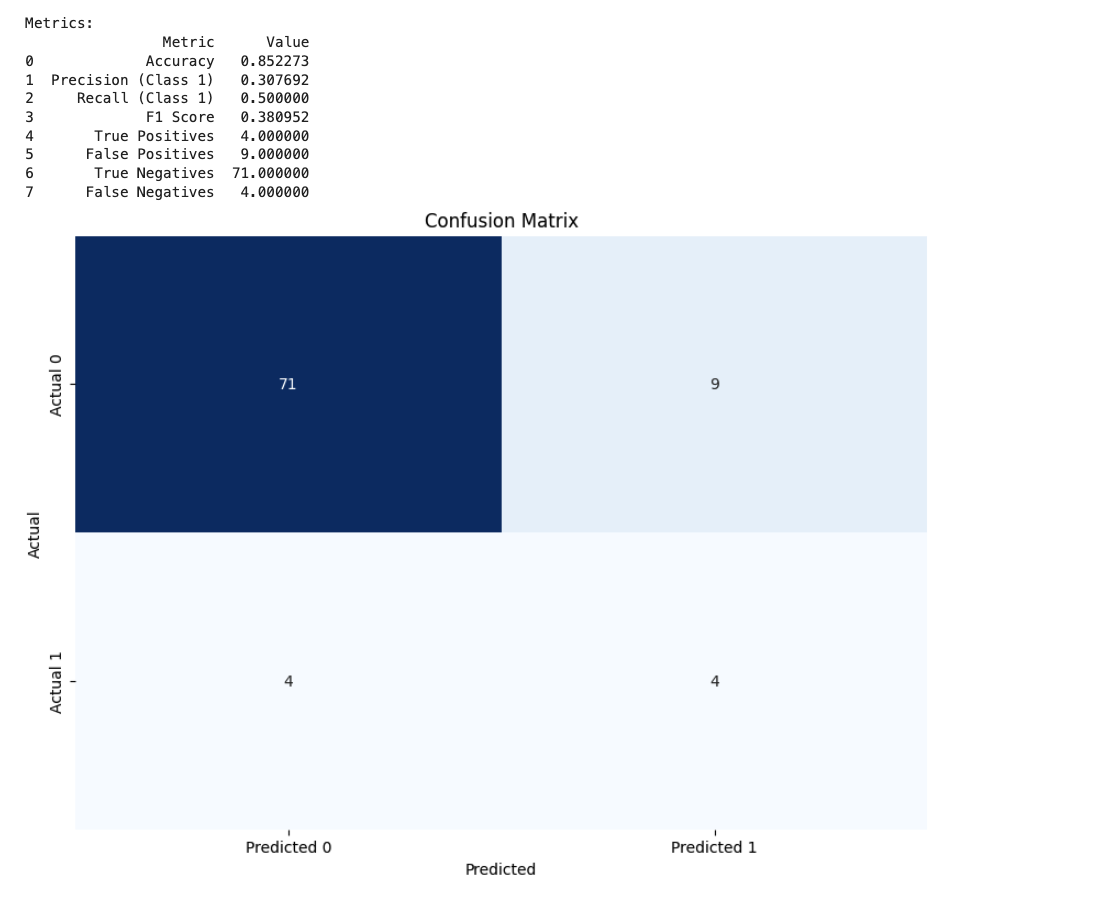

---

# <font color = red> Template Prep
## <font color = blue> Generate Scenarios
### <font color = green> Dry Run - Sample for Validation

---

In [ ]:
# import requests
# import numpy as np
# import pandas as pd
# import torch
# from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
# from datetime import datetime
# import re
# import os
# import random

# # Parameters
# data_dir = '/home/ubuntu/efs-w210-capstone-ebs/00.GabbleGrid/02.Local_Data_Files'
# save_dir = '/home/ubuntu/efs-w210-capstone-ebs/00.GabbleGrid/project/admin/01.Templates'
# file_prefix = "06.20240714_062624_non_overlap_full_test"

# # Define the number of records for each test run (input_length + gap + prediction_period)
# num_records_per_test = lambda input_length, gap, prediction_period: input_length + gap + prediction_period

# # Load the test data
# X_test = np.load(f"{data_dir}/{file_prefix}_X_test.npy")
# y_test = np.load(f"{data_dir}/{file_prefix}_y_test.npy")

# # Load the original parquet file with sequence mapping
# input_file = f"{data_dir}/03.20240715_143154_orig_input_w_seq_info_FINAL.parquet"
# original_df = pd.read_parquet(input_file)

# # Ensure Seq_Num is integer for proper merging
# original_df['Seq_Num'] = original_df['Seq_Num'].astype(int)

# # Function to prepare data for the model
# def prepare_data_for_model(X_test, start_seq_num, num_records_per_test, num_tests, original_df, max_events):
#     start_index_x_test = (start_seq_num - original_df[original_df['Train_Test'] == 'Test']['Seq_Num'].min()) // num_records_per_test
#     end_index_x_test = min(start_index_x_test + num_tests, len(X_test))
#     X_test_limited = X_test[start_index_x_test:end_index_x_test]
#     X_test_limited = X_test_limited[:, :, 1:max_events + 16]
#     X_test_tensor = torch.tensor(X_test_limited, dtype=torch.float32)
#     return X_test_tensor, start_index_x_test, end_index_x_test

# # Function to clean text
# def clean_text(text):
#     text = re.sub(r'<\*?>', '', text)
#     text = text.replace('<', '').replace('>', '')
#     return text

# # Function to consolidate events and map to templates
# def consolidate_events_to_text(df, start_col, end_col, col_name, master_tracking_df, eventid_to_template):
#     consolidated = []
#     for i, row in df.iterrows():
#         seen_events = set()
#         events = []
#         for seq_num in range(row[start_col], row[end_col] + 1):
#             if col_name in master_tracking_df.columns:
#                 event_list = master_tracking_df[master_tracking_df['Seq_Num'] == seq_num][col_name].astype(str).tolist()
#                 for event in event_list:
#                     for e in event.split(', '):
#                         if e not in seen_events:
#                             seen_events.add(e)
#                             if int(e) in eventid_to_template:
#                                 cleaned_text = clean_text(eventid_to_template[int(e)])
#                                 events.append(f'"{cleaned_text}"')
#                             else:
#                                 events.append('"Unknown"')
#         consolidated.append(', '.join(events))
#     return consolidated

# # Main function to run the experiment
# def run_experiment(max_events, input_length, gap, prediction_period, start_time, num_tests):
#     filtered_df = original_df[(original_df['Train_Test'] == 'Test') & (original_df['time_start'] == start_time)]
#     if filtered_df.empty:
#         start_date = pd.to_datetime(start_time).date()
#         same_date_df = original_df[(original_df['Train_Test'] == 'Test') & (pd.to_datetime(original_df['time_start']).dt.date == start_date)]
#         if not same_date_df.empty:
#             available_times = same_date_df['time_start'].unique().tolist()
#             # print(f"Error: start_time {start_time} not found in the dataset. Available times on {start_date} are: {available_times}")
#         all_times_df = original_df[original_df['Train_Test'] == 'Test'].copy()
#         all_times_df['time_start'] = pd.to_datetime(all_times_df['time_start'])
#         nearest_time = all_times_df.iloc[(all_times_df['time_start'] - pd.to_datetime(start_time)).abs().argsort()[:1]]['time_start'].values[0]
#         # print(f"Error: start_time {start_time} not found in the dataset. The nearest available time is: {nearest_time}")
#         start_time = nearest_time  # Update the start_time to the nearest available time
#         filtered_df = original_df[(original_df['Train_Test'] == 'Test') & (original_df['time_start'] == start_time)].copy()

#     start_seq_num = int(filtered_df['Seq_Num'].values[0])
#     max_end_seq_num = int(original_df[original_df['Train_Test'] == 'Test']['Seq_Num'].max())
#     expected_end_seq_num = start_seq_num + num_tests * num_records_per_test(input_length, gap, prediction_period) - 1

#     if expected_end_seq_num > max_end_seq_num:
#         max_allowed_runs = (max_end_seq_num - start_seq_num + 1) // num_records_per_test(input_length, gap, prediction_period)
#         # print(f"Number of test runs exceeds the maximum allowed ({max_allowed_runs}). Setting num_tests to {max_allowed_runs}.")
#         num_tests = max_allowed_runs
#         expected_end_seq_num = start_seq_num + num_tests * num_records_per_test(input_length, gap, prediction_period) - 1

#     X_test_tensor, start_index_x_test, end_index_x_test = prepare_data_for_model(X_test, start_seq_num, num_records_per_test(input_length, gap, prediction_period), num_tests, original_df, max_events)

#     # print(f"X_test shape after adjusting columns: {X_test_tensor.shape}")

#     data = {
#         'X_test': X_test_tensor.tolist(),
#         'input_length': input_length,
#         'gap': gap,
#         'prediction_period': prediction_period,
#         'max_events': max_events
#     }

#     response = requests.post('http://0.0.0.0:5000/predict', json=data)

#     # print("Raw response text:", response.text)

#     try:
#         response_data = response.json()
#     except ValueError as e:
#         print("Failed to parse JSON response:", e)
#         response_data = {}

#     if 'predictions' in response_data:
#         predictions = np.array(response_data['predictions']).flatten()
#         model_name = response_data.get('model_name', 'unknown_model')

#         num_predictions = len(predictions)
#         num_tests = min(num_tests, num_predictions)  # Adjust num_tests to the number of predictions returned

#         tracking_data = []

#         for i in range(num_tests):
#             total_seq_start = start_seq_num + i * num_records_per_test(input_length, gap, prediction_period)
#             total_seq_end = total_seq_start + num_records_per_test(input_length, gap, prediction_period) - 1
#             source_seq_start = total_seq_start
#             source_seq_end = source_seq_start + input_length - 1
#             gap_seq_start = source_seq_end + 1
#             gap_seq_end = gap_seq_start + gap - 1
#             prediction_seq_start = total_seq_end - prediction_period + 1
#             prediction_seq_end = total_seq_end
            
#             tracking_data.append([
#                 total_seq_start, total_seq_end, source_seq_start, source_seq_end,
#                 gap_seq_start, gap_seq_end, prediction_seq_start, prediction_seq_end,
#                 predictions[i], y_test[start_index_x_test + i],
#                 str(original_df[original_df['Seq_Num'] == source_seq_start]['time_start'].values[0])
#             ])

#         tracking_df = pd.DataFrame(tracking_data, columns=[
#             "Total_Seq_Start", "Total_Seq_End", "Source_Seq_Start", "Source_Seq_End",
#             "Gap_Seq_Start", "Gap_Seq_End", "Prediction_Seq_Start", "Prediction_Seq_End",
#             "Predicted", "Actual", "time_start"
#         ])

#         conf_matrix = confusion_matrix(y_test[start_index_x_test:end_index_x_test], predictions, labels=[0, 1])
#         precision = precision_score(y_test[start_index_x_test:end_index_x_test], predictions, zero_division=0)
#         recall = recall_score(y_test[start_index_x_test:end_index_x_test], predictions, zero_division=0)
#         accuracy = accuracy_score(y_test[start_index_x_test:end_index_x_test], predictions)
#         f1 = f1_score(y_test[start_index_x_test:end_index_x_test], predictions, zero_division=0)

#         if conf_matrix.size == 4:
#             tn, fp, fn, tp = conf_matrix.ravel()
#         else:
#             tn = conf_matrix[0, 0] if conf_matrix.shape[0] > 0 else 0
#             fp = conf_matrix[0, 1] if conf_matrix.shape[1] > 1 else 0
#             fn = conf_matrix[1, 0] if conf_matrix.shape[0] > 1 else 0
#             tp = conf_matrix[1, 1] if conf_matrix.shape[1] > 1 else 0

#         timestamp = datetime.now().strftime('%Y%m%d%H%M%S')
#         metrics_data = {
#             'Experiment': [timestamp] * num_tests,
#             'Sample': list(range(1, num_tests + 1)),
#             'Max_Events': [max_events] * num_tests,
#             'Input_Length': [input_length] * num_tests,
#             'Gap': [gap] * num_tests,
#             'Prediction_Period': [prediction_period] * num_tests,
#             'Exp_Start_Time': [start_time] * num_tests,
#             'Num_Tests': [num_tests] * num_tests,
#             'Model_Name': [model_name] * num_tests,
#             'Precision': [precision] * num_tests,
#             'Recall': [recall] * num_tests,
#             'Accuracy': [accuracy] * num_tests,
#             'F1_Score': [f1] * num_tests,
#             'TN': [tn] * num_tests,
#             'FP': [fp] * num_tests,
#             'FN': [fn] * num_tests,
#             'TP': [tp] * num_tests
#         }
#         metrics_df = pd.DataFrame(metrics_data)

#         combined_df = pd.concat([metrics_df, tracking_df], axis=1)

#         master_tracking_file = f"{data_dir}/03B.20240716_072206_orig_parquet_mapper_agents.parquet"
#         master_tracking_df = pd.read_parquet(master_tracking_file)

#         merged_df = combined_df.merge(master_tracking_df, left_on='Source_Seq_Start', right_on='Seq_Num', how='left')

#         merged_df.rename(columns={'time_start_y': 'Sample_Start_Time'}, inplace=True)

#         columns_to_keep = [
#             "Experiment", "Sample", "Max_Events", "Input_Length", "Gap", "Prediction_Period",
#             "Exp_Start_Time", "Num_Tests", "Model_Name", "Precision", "Recall", "Accuracy", "F1_Score", "TN", "FP", "FN", "TP",
#             "Total_Seq_Start", "Total_Seq_End", "Source_Seq_Start", "Source_Seq_End", "Gap_Seq_Start",
#             "Gap_Seq_End", "Prediction_Seq_Start", "Prediction_Seq_End", "Predicted", "Actual", "Sample_Start_Time",
#             "Class", "unique_events", "most_frequent_event", "transitions", "entropy", "hour_of_day", "day_of_week",
#             "event_count", "top_event_frequency", "prev_event_count", "transition_rate", "high_transition_rate",
#             "prev_entropy", "entropy_change", "rolling_event_count", "rolling_unique_event_count"
#         ]

#         missing_columns = [col for col in columns_to_keep if col not in merged_df.columns]
#         # if missing_columns:
#             # print(f"Warning: The following columns are missing from merged_df: {missing_columns}")

#         columns_to_keep = [col if col != 'time_start' else 'Sample_Start_Time' for col in columns_to_keep]

#         filtered_df = merged_df[columns_to_keep].copy()

#         eventid_encoding_file = f"{data_dir}/08.20240716031626_event_ID_int_template_mapping.csv"
#         eventid_encoding_df = pd.read_csv(eventid_encoding_file)

#         eventid_to_template = dict(zip(eventid_encoding_df['EncodedValue'], eventid_encoding_df['EventTemplate']))

#         filtered_df['runtime_most_frequent_consl_text'] = consolidate_events_to_text(filtered_df, 'Source_Seq_Start', 'Source_Seq_End', 'most_frequent_event', master_tracking_df, eventid_to_template)
#         filtered_df['runtime_least_frequent_consl_text'] = consolidate_events_to_text(filtered_df, 'Source_Seq_Start', 'Source_Seq_End', 'most_frequent_event', master_tracking_df, eventid_to_template)

#         final_file = f"{save_dir}/A-Template_Detail.parquet"

#         filtered_df['Experiment'] = filtered_df['Experiment'].astype(int)
#         filtered_df['Exp_Start_Time'] = filtered_df['Exp_Start_Time'].astype(str)  # Convert Exp_Start_Time to string
        
#         if os.path.exists(final_file):
#             existing_df = pd.read_parquet(final_file)
#             combined_final_df = pd.concat([existing_df, filtered_df])
#             combined_final_df.to_parquet(final_file, index=False)
#         else:
#             filtered_df.to_parquet(final_file, index=False)
        
#         # print(f"Final file with consolidated columns saved to: {final_file}")

#         saved_results = pd.read_parquet(final_file)
#         # print("********************** Displaying the last 5 rows from the saved parquet file (Tail)  ******************************************")
#         # display(saved_results.tail(5))

#     # else:
#         # print("No predictions found in the response.")

# # Define parameter ranges
# max_events_list = [5, 10, 20, 30, 40]
# input_length_list = [20, 30]
# gap_list = [1, 2, 3, 4, 5]
# prediction_period_list = [1]
# start_times_list = pd.date_range(start='2005-11-08', end='2006-01-04').strftime('%Y-%m-%d %H:%M:%S').tolist()
# num_tests_list = list(range(10, 131))

# # Generate 5 random parameter combinations
# random_combinations = random.sample([
#     (max_events, input_length, gap, prediction_period, start_time, num_tests)
#     for max_events in max_events_list
#     for input_length in input_length_list
#     for gap in gap_list
#     for prediction_period in prediction_period_list
#     for start_time in start_times_list
#     for num_tests in num_tests_list
# ], 10)

# # Run the experiments
# for combination in random_combinations:
#     max_events, input_length, gap, prediction_period, start_time, num_tests = combination
#     print(f"Running experiment with parameters: max_events={max_events}, input_length={input_length}, gap={gap}, prediction_period={prediction_period}, start_time={start_time}, num_tests={num_tests}")
#     run_experiment(max_events, input_length, gap, prediction_period, start_time, num_tests)

---
## Queries on the combination runs

In [ ]:
# import pandas as pd

# # Load the consolidated DataFrame from the parquet file
# final_file = f"{save_dir}/A-Template_Detail.parquet"
# consolidated_df = pd.read_parquet(final_file)

# # Display the entire dataframe (for debugging purpose)
# # print(consolidated_df)

# # Query the entries ordered by 'Experiment' and 'Sample' columns in descending order
# def get_ordered_entries(df, n=5):
#     # Ensure 'Experiment' column is treated as a string
#     df['Experiment'] = df['Experiment'].astype(str)
#     # Sort the DataFrame by 'Experiment' and 'Sample' in descending order
#     df_sorted = df.sort_values(by=['Experiment', 'Sample'], ascending=[False, False])
#     # Get the top n entries
#     ordered_entries = df_sorted.head(n)
#     return ordered_entries

# # Get the top 5 entries ordered by 'Experiment' and 'Sample'
# ordered_entries = get_ordered_entries(consolidated_df, n=5)
# print("Top 5 Entries Ordered by 'Experiment' and 'Sample' in Descending Order:")
# display(ordered_entries)


In [ ]:
# import pandas as pd

# # Load the consolidated DataFrame from the parquet file
# final_file = f"{save_dir}/A-Template_Detail.parquet"
# consolidated_df = pd.read_parquet(final_file)

# # Convert 'Experiment' column to datetime
# consolidated_df['Experiment'] = pd.to_datetime(consolidated_df['Experiment'], format='%Y%m%d%H%M%S')

# # Count the number of distinct experiments
# num_distinct_experiments = consolidated_df['Experiment'].nunique()

# print(f"Number of distinct experiments in the full file: {num_distinct_experiments}")

In [ ]:
# import pandas as pd

# # Load the consolidated DataFrame from the parquet file
# final_file = f"{save_dir}/A-Template_Detail.parquet"
# consolidated_df = pd.read_parquet(final_file)

# # Convert 'Experiment' column to datetime (if necessary)
# consolidated_df['Experiment'] = pd.to_datetime(consolidated_df['Experiment'], format='%Y%m%d%H%M%S')

# # Count the number of distinct model names
# num_distinct_models = consolidated_df['Model_Name'].nunique()

# print(f"Number of distinct model names in the full file: {num_distinct_models}")

---

# Validate the parquet file

In [5]:
import pandas as pd

# Path to the Parquet file
file_path = '/home/ubuntu/efs-w210-capstone-ebs/00.GabbleGrid/project/admin/01.Templates/A-Template_Detail.parquet'

# Load the Parquet file
df = pd.read_parquet(file_path)

# Display the contents of the Parquet file
# display(df.tail())

# Function to get the basic stats for each experiment
def get_experiment_stats(df):
    stats = df.groupby('Experiment').agg({
        'Sample': 'max',
        'Max_Events': 'first',
        'Input_Length': 'first',
        'Gap': 'first',
        'Prediction_Period': 'first',
        'Num_Tests': 'first',
        'Model_Name': 'first',
        'Precision': 'first',
        'Recall': 'first',
        'Accuracy': 'first',
        'F1_Score': 'first',
        'TN': 'first',
        'FP': 'first',
        'FN': 'first',
        'TP': 'first'
    }).reset_index()
    return stats

# Get the basic stats for each experiment
experiment_stats = get_experiment_stats(df)

# Display the stats
print("Basic Stats for Each Experiment:")
display(experiment_stats)

# Get a list of experiments ordered by descending values of Precision
experiments_by_precision = experiment_stats.sort_values(by='Precision', ascending=False)

# Display the experiments sorted by Precision
print("Experiments Ordered by Precision (Descending):")
display(experiments_by_precision)

Basic Stats for Each Experiment:


,Experiment,Sample,Max_Events,Input_Length,Gap,Prediction_Period,Num_Tests,Model_Name,Precision,Recall,Accuracy,F1_Score,TN,FP,FN,TP
0,20240804072102,45,20,30,2,1,45,20240712_Transformers_Non_Overlapping_run_13_of_180.pt,0.000000,0.000000,0.866667,0.000000,39,0,6,0
1,20240804072256,88,5,30,2,1,88,20240712_Transformers_Non_Overlapping_run_13_of_180.pt,0.307692,0.500000,0.852273,0.380952,71,9,4,4
2,20240804072614,49,10,30,3,1,49,20240712_Transformers_Non_Overlapping_run_13_of_180.pt,0.157895,0.500000,0.612245,0.240000,27,16,3,3
3,20240804073409,49,10,30,3,1,49,20240712_Transformers_Non_Overlapping_run_13_of_180.pt,0.157895,0.500000,0.612245,0.240000,27,16,3,3
4,20240804073514,49,20,20,3,1,49,20240712_Transformers_Non_Overlapping_run_13_of_180.pt,0.166667,0.500000,0.632653,0.250000,28,15,3,3
5,20240804073833,49,20,20,3,1,49,20240712_Transformers_Non_Overlapping_run_13_of_180.pt,0.166667,0.500000,0.632653,0.250000,28,15,3,3
6,20240804074125,49,20,20,3,1,49,20240712_Transformers_Non_Overlapping_run_13_of_180.pt,0.166667,0.500000,0.632653,0.250000,28,15,3,3
7,20240804075603,49,20,20,4,1,49,20240712_Transformers_Non_Overlapping_run_77_of_180.pt,0.400000,0.333333,0.857143,0.363636,40,3,4,2
8,20240804075620,47,5,20,5,1,47,20240712_Transformers_Non_Overlapping_run_19_of_180.pt,0.000000,0.000000,0.936170,0.000000,44,0,3,0
9,20240804075623,27,20,30,4,1,27,20240712_Transformers_Non_Overlapping_run_87_of_180.pt,0.000000,0.000000,0.925926,0.000000,25,1,1,0


Experiments Ordered by Precision (Descending):


,Experiment,Sample,Max_Events,Input_Length,Gap,Prediction_Period,Num_Tests,Model_Name,Precision,Recall,Accuracy,F1_Score,TN,FP,FN,TP
20,20240804083253,69,30,30,3,1,69,20240712_Transformers_Non_Overlapping_run_115_of_180.pt,1.000000,0.125000,0.898551,0.222222,61,0,7,1
24,20240804083722,54,5,20,3,1,54,20240712_Transformers_Non_Overlapping_run_15_of_180.pt,0.500000,0.500000,0.925926,0.500000,48,2,2,2
27,20240804084429,80,30,20,4,1,80,20240712_Transformers_Non_Overlapping_run_107_of_180.pt,0.500000,0.666667,0.925000,0.571429,70,4,2,4
11,20240804080324,49,20,20,4,1,49,20240712_Transformers_Non_Overlapping_run_77_of_180.pt,0.400000,0.333333,0.857143,0.363636,40,3,4,2
13,20240804082111,49,20,20,4,1,49,20240712_Transformers_Non_Overlapping_run_77_of_180.pt,0.400000,0.333333,0.857143,0.363636,40,3,4,2
7,20240804075603,49,20,20,4,1,49,20240712_Transformers_Non_Overlapping_run_77_of_180.pt,0.400000,0.333333,0.857143,0.363636,40,3,4,2
12,20240804081507,49,20,20,4,1,49,20240712_Transformers_Non_Overlapping_run_77_of_180.pt,0.400000,0.333333,0.857143,0.363636,40,3,4,2
29,20240804084436,8,20,30,3,1,8,20240712_Transformers_Non_Overlapping_run_85_of_180.pt,0.333333,1.000000,0.750000,0.500000,5,2,0,1
33,20240804084449,73,40,20,4,1,73,20240712_Transformers_Non_Overlapping_run_137_of_180.pt,0.333333,0.250000,0.931507,0.285714,67,2,3,1
25,20240804083725,112,5,20,3,1,112,20240712_Transformers_Non_Overlapping_run_15_of_180.pt,0.333333,0.444444,0.883929,0.380952,95,8,5,4


In [8]:
import pandas as pd

# Path to the updated Parquet file
file_path = '/home/ubuntu/efs-w210-capstone-ebs/00.GabbleGrid/project/admin/01.Templates/A-Template_Detail.parquet'

# Load the updated Parquet file
df_updated = pd.read_parquet(file_path)

# Function to get the summary stats
def get_summary_stats(df):
    summary = {
        'Number of Experiments': df['Experiment'].nunique(),
        'Max Samples': df.groupby('Experiment')['Sample'].max().max(),
        'Max Events': df['Max_Events'].max(),
        'Input Length': df['Input_Length'].max(),
        'Gap': df['Gap'].max(),
        'Prediction Period': df['Prediction_Period'].max(),
        'Num Tests': df['Num_Tests'].max(),
        'Model Names': df['Model_Name'].nunique(),
        'Average Precision': df['Precision'].mean(),
        'Average Recall': df['Recall'].mean(),
        'Average Accuracy': df['Accuracy'].mean(),
        'Average F1 Score': df['F1_Score'].mean(),
        'Total TN': df['TN'].sum(),
        'Total FP': df['FP'].sum(),
        'Total FN': df['FN'].sum(),
        'Total TP': df['TP'].sum()
    }
    return summary

# Get the summary stats
summary_stats = get_summary_stats(df_updated)

# Display the summary statistics
print("Summary Statistics:")
for key, value in summary_stats.items():
    print(f"{key}: {value}")


Summary Statistics:
Number of Experiments: 46
Max Samples: 112
Max Events: 40
Input Length: 30
Gap: 5
Prediction Period: 1
Num Tests: 112
Model Names: 25
Average Precision: 0.18450384131171021
Average Recall: 0.2273203120518557
Average Accuracy: 0.8637067630356222
Average F1 Score: 0.17498903192650986
Total TN: 94227
Total FP: 7986
Total FN: 7099
Total TP: 2679


---
# <font color = blue>Admin - Maintain Experiments

In [3]:
# import pandas as pd

# file_path = '/home/ubuntu/efs-w210-capstone-ebs/00.GabbleGrid/project/admin/01.Templates/A-Template_Detail_Updated.parquet'

# # Load the Parquet file
# df = pd.read_parquet(file_path)

# # Convert the 'Experiment' column to strings
# df['Experiment'] = df['Experiment'].astype(str)

# # List of experiments to delete
# experiments_to_delete = [
#     '20240804033638', '20240804033747', '20240804033853', '20240804035353', '20240804035550',
#     '20240804035614', '20240804040011', '20240804051316', '20240804063434', '20240804064645',
#     '20240804070218', '20240804070441', '20240804070701', '20240804071201', '20240804071248'
# ]

# # Check if these experiments are still in the DataFrame
# experiments_still_present = df['Experiment'].isin(experiments_to_delete).any()

# print(f"Are any of the experiments still present? {experiments_still_present}")

# if experiments_still_present:
#     # If they are, let's delete them now
#     df_updated = df[~df['Experiment'].isin(experiments_to_delete)]
    
#     # Save the updated DataFrame back to the same file
#     df_updated.to_parquet(file_path, index=False)
    
#     print(f"Original number of rows: {len(df)}")
#     print(f"Updated number of rows: {len(df_updated)}")
    
#     # Verify the deletion
#     remaining_experiments = df_updated['Experiment'].unique()
#     print("\nRemaining experiments:")
#     print(remaining_experiments)
# else:
#     print("The specified experiments are not present in the file.")

Are any of the experiments still present? False
The specified experiments are not present in the file.


In [4]:
# # Now let's run your original analysis on the updated DataFrame
# def get_experiment_stats(df):
#     stats = df.groupby('Experiment').agg({
#         'Sample': 'max',
#         'Max_Events': 'first',
#         'Input_Length': 'first',
#         'Gap': 'first',
#         'Prediction_Period': 'first',
#         'Num_Tests': 'first',
#         'Model_Name': 'first',
#         'Precision': 'first',
#         'Recall': 'first',
#         'Accuracy': 'first',
#         'F1_Score': 'first',
#         'TN': 'first',
#         'FP': 'first',
#         'FN': 'first',
#         'TP': 'first'
#     }).reset_index()
#     return stats

# # Get the basic stats for each experiment
# experiment_stats = get_experiment_stats(df_updated if experiments_still_present else df)

# # Display the stats
# print("\nBasic Stats for Each Experiment:")
# display(experiment_stats)

# # Get a list of experiments ordered by descending values of Precision
# experiments_by_precision = experiment_stats.sort_values(by='Precision', ascending=False)

# # Display the experiments sorted by Precision
# print("\nExperiments Ordered by Precision (Descending):")
# display(experiments_by_precision)


Basic Stats for Each Experiment:


,Experiment,Sample,Max_Events,Input_Length,Gap,Prediction_Period,Num_Tests,Model_Name,Precision,Recall,Accuracy,F1_Score,TN,FP,FN,TP
0,20240804072102,45,20,30,2,1,45,20240712_Transformers_Non_Overlapping_run_13_of_180.pt,0.000000,0.000000,0.866667,0.000000,39,0,6,0
1,20240804072256,88,5,30,2,1,88,20240712_Transformers_Non_Overlapping_run_13_of_180.pt,0.307692,0.500000,0.852273,0.380952,71,9,4,4
2,20240804072614,49,10,30,3,1,49,20240712_Transformers_Non_Overlapping_run_13_of_180.pt,0.157895,0.500000,0.612245,0.240000,27,16,3,3
3,20240804073409,49,10,30,3,1,49,20240712_Transformers_Non_Overlapping_run_13_of_180.pt,0.157895,0.500000,0.612245,0.240000,27,16,3,3
4,20240804073514,49,20,20,3,1,49,20240712_Transformers_Non_Overlapping_run_13_of_180.pt,0.166667,0.500000,0.632653,0.250000,28,15,3,3
5,20240804073833,49,20,20,3,1,49,20240712_Transformers_Non_Overlapping_run_13_of_180.pt,0.166667,0.500000,0.632653,0.250000,28,15,3,3
6,20240804074125,49,20,20,3,1,49,20240712_Transformers_Non_Overlapping_run_13_of_180.pt,0.166667,0.500000,0.632653,0.250000,28,15,3,3
7,20240804075603,49,20,20,4,1,49,20240712_Transformers_Non_Overlapping_run_77_of_180.pt,0.400000,0.333333,0.857143,0.363636,40,3,4,2
8,20240804075620,47,5,20,5,1,47,20240712_Transformers_Non_Overlapping_run_19_of_180.pt,0.000000,0.000000,0.936170,0.000000,44,0,3,0
9,20240804075623,27,20,30,4,1,27,20240712_Transformers_Non_Overlapping_run_87_of_180.pt,0.000000,0.000000,0.925926,0.000000,25,1,1,0



Experiments Ordered by Precision (Descending):


,Experiment,Sample,Max_Events,Input_Length,Gap,Prediction_Period,Num_Tests,Model_Name,Precision,Recall,Accuracy,F1_Score,TN,FP,FN,TP
20,20240804083253,69,30,30,3,1,69,20240712_Transformers_Non_Overlapping_run_115_of_180.pt,1.000000,0.125000,0.898551,0.222222,61,0,7,1
24,20240804083722,54,5,20,3,1,54,20240712_Transformers_Non_Overlapping_run_15_of_180.pt,0.500000,0.500000,0.925926,0.500000,48,2,2,2
27,20240804084429,80,30,20,4,1,80,20240712_Transformers_Non_Overlapping_run_107_of_180.pt,0.500000,0.666667,0.925000,0.571429,70,4,2,4
11,20240804080324,49,20,20,4,1,49,20240712_Transformers_Non_Overlapping_run_77_of_180.pt,0.400000,0.333333,0.857143,0.363636,40,3,4,2
13,20240804082111,49,20,20,4,1,49,20240712_Transformers_Non_Overlapping_run_77_of_180.pt,0.400000,0.333333,0.857143,0.363636,40,3,4,2
7,20240804075603,49,20,20,4,1,49,20240712_Transformers_Non_Overlapping_run_77_of_180.pt,0.400000,0.333333,0.857143,0.363636,40,3,4,2
12,20240804081507,49,20,20,4,1,49,20240712_Transformers_Non_Overlapping_run_77_of_180.pt,0.400000,0.333333,0.857143,0.363636,40,3,4,2
29,20240804084436,8,20,30,3,1,8,20240712_Transformers_Non_Overlapping_run_85_of_180.pt,0.333333,1.000000,0.750000,0.500000,5,2,0,1
33,20240804084449,73,40,20,4,1,73,20240712_Transformers_Non_Overlapping_run_137_of_180.pt,0.333333,0.250000,0.931507,0.285714,67,2,3,1
25,20240804083725,112,5,20,3,1,112,20240712_Transformers_Non_Overlapping_run_15_of_180.pt,0.333333,0.444444,0.883929,0.380952,95,8,5,4


---
# <font color = red> Check Historical Weather Data

## <font color = orange> Read Converted Historical Data for BG/L Location (Livermore)

In [ ]:
# import pandas as pd

# # Path to the Parquet file
# parquet_file_path = '/home/ubuntu/efs-w210-capstone-ebs/00.GabbleGrid/04.Local_Other_Files/20240803_Historical_Weather_94550/openweathermap_livermore.parquet'

# # Load the Parquet file
# df_weather_parquet = pd.read_parquet(parquet_file_path)

# # Display the head of the DataFrame
# display(df_weather_parquet.head())

---
# <font color = green> Plot Temperate and TP/FP

---

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load the Parquet file for weather data
parquet_file_path_weather = '/home/ubuntu/efs-w210-capstone-ebs/00.GabbleGrid/04.Local_Other_Files/20240803_Historical_Weather_94550/openweathermap_livermore.parquet'
df_weather_parquet = pd.read_parquet(parquet_file_path_weather)

# Load the Parquet file for experiment data
file_path = '/home/ubuntu/efs-w210-capstone-ebs/00.GabbleGrid/project/admin/01.Templates/A-Template_Detail.parquet'
df_experiment = pd.read_parquet(file_path)

# Filter for the specific experiment
experiment_id = 20240804081507
df_experiment_filtered = df_experiment[df_experiment['Experiment'] == experiment_id].copy()

# Focus on the relevant columns
df_experiment_filtered = df_experiment_filtered[['Sample_Start_Time', 'Sample', 'Predicted', 'Actual']]

# Convert Sample_Start_Time to datetime
df_experiment_filtered['Sample_Start_Time'] = pd.to_datetime(df_experiment_filtered['Sample_Start_Time'])

# Ensure 'Predicted' and 'Actual' columns are integers
df_experiment_filtered['Predicted'] = df_experiment_filtered['Predicted'].astype(int)
df_experiment_filtered['Actual'] = df_experiment_filtered['Actual'].astype(int)

# Create a new column for categorizing TP and FP
df_experiment_filtered['Category'] = 'Other'
df_experiment_filtered.loc[(df_experiment_filtered['Predicted'] == 1) & (df_experiment_filtered['Actual'] == 1), 'Category'] = 'True Positive'
df_experiment_filtered.loc[(df_experiment_filtered['Predicted'] == 1) & (df_experiment_filtered['Actual'] == 0), 'Category'] = 'False Positive'

# Round Sample_Start_Time to the nearest hour
df_experiment_filtered['Sample_Start_Time_Hour'] = df_experiment_filtered['Sample_Start_Time'].dt.round('h')

# Ensure weather data is in the same timezone
df_weather_parquet['gn_dt_pacific'] = pd.to_datetime(df_weather_parquet['gn_dt_pacific'], errors='coerce').dt.tz_localize(None).dt.round('h')

# Print head of both DataFrames before merging
# print("Experiment DataFrame head:")
# # print(df_experiment_filtered.head())
# # print("\nWeather DataFrame head:")
# print(df_weather_parquet.head())

# Merge the weather and experiment data on the date
df_merged = pd.merge(df_weather_parquet, df_experiment_filtered, left_on='gn_dt_pacific', right_on='Sample_Start_Time_Hour', how='inner')

# Check if the merged DataFrame is empty
# print("\nMerged DataFrame head:")
# print(df_merged.head())

# Plotting
if not df_merged.empty:
    plt.figure(figsize=(14, 7))

    # Line plot for temperature with thicker lines
    plt.plot(df_merged['gn_dt_pacific'], df_merged['gn_temp_max'], label='Max Temperature (°F)', color='lightblue', linestyle='-', marker='', linewidth=3.5, zorder=1)

    # Scatter plot for True Positives and False Positives
    categories = ['True Positive', 'False Positive']
    colors = {'True Positive': 'green', 'False Positive': 'tomato'}
    sizes = {'True Positive': 150, 'False Positive': 150}  # Larger sizes for more visibility
    opacities = {'True Positive': 1.0, 'False Positive': 1.0}  # Fully opaque

    for category in categories:
        subset = df_merged[df_merged['Category'] == category]
        plt.scatter(subset['gn_dt_pacific'], subset['gn_temp_max'], label=category, color=colors[category], s=sizes[category], alpha=opacities[category], zorder=2)  # s for size, alpha for opacity

    # Adding titles and labels
    plt.title('Max Temperature Over Time with True and False Positives for Experiment 20240804040011')
    plt.xlabel('Date')
    plt.ylabel('Max Temperature (°F)')
    plt.legend()

    # Setting xticks for each day
    plt.gca().xaxis.set_major_locator(mdates.DayLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.xticks(rotation=45, ha='right')

    # Light and almost invisible grid lines
    plt.grid(True, which='both', color='lightgrey', linestyle='-', linewidth=0.5)

    plt.tight_layout()

    # Show plot
    plt.show()
else:
    print("Merged DataFrame is empty. No data to plot.")
